In [13]:
import requests
import networkx as nx
import json
import matplotlib.pyplot as plt

url = 'https://api.aviationapi.com/v1/preferred-routes'
response = requests.get(url)
data = json.loads(response.text)

# create empty graph 
G = nx.Graph()

#loop through origin & add nodes and edges
for datas in data:
    origin = datas['origin']
    destination = datas['destination']
    route = datas['route']
    G.add_node(origin)
    G.add_node(destination)
    G.add_edge(origin, destination, route = route)


print("The number of nodes :",G.number_of_nodes()) #calculates the number of nodes
print("The number of edges :",G.number_of_edges()) #calculates the number of edges   

#centrality measures

deg_cent = nx.degree_centrality(G) #degree centrality
for i in sorted(deg_cent, key = deg_cent.get, reverse = True)[:10]:
  print(i, deg_cent[i])
#bet_cent = nx.betweenness_centrality(G) #betweenness centrality

imp_deg_nodes = max(deg_cent,key=deg_cent.get) # important nodes from degreee centrality
#imp_bet_nodes = max(bet_cent, key=bet_cent.get) #important nodes from betweenness centrality

print("Degree centrality nodes:", imp_deg_nodes)




The number of nodes : 583
The number of edges : 4769
EWR 0.3161512027491409
LGA 0.2508591065292096
HPN 0.2388316151202749
JFK 0.23195876288659795
ORD 0.211340206185567
BWI 0.2079037800687285
BOS 0.20618556701030927
PHL 0.1993127147766323
IAD 0.19415807560137457
DCA 0.18900343642611683
Degree centrality nodes: EWR


In [14]:
fig, ax = plt.subplots(figsize  = (200,200))
nx.draw(G, ax= ax, node_size = 1000, with_labels =True, font_size  = 55, edge_color = 'red')
plt.show()



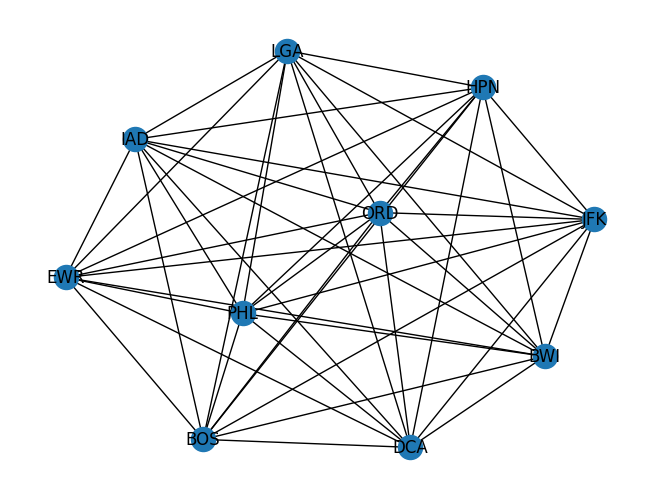

In [15]:

#sort the nodes by degree centrality and get the top  nodes

subgraph = G.subgraph(top_10_nodes)
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True)
plt.show()

In [4]:
nx.write_graphml(G, "output.graphml", prettyprint = False)